In [3]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\dell\anaconda3\lib\site-packages (3.9.2)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"Customer Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


## Observation:
## In the above observation we find that the "TotalCharge" have object type beacause some blank/white space is in the data set.
## For this reasone it didnot convert whole column into float datatype.
## First repalce all the blank space into 0 value as tenure is 0 and no total charges, then convert the datatype.


In [4]:
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Finding how many Customer chrun out.

In [8]:
data["Churn"].count()

7043

In [9]:
#data.groupby('Churn').count()
gr=data.groupby('Churn').agg({'Churn':'count'})
gr

,Churn
Churn,
No,5174
Yes,1869


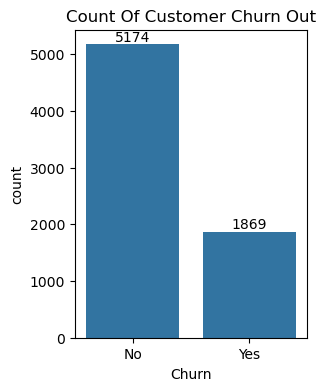

In [10]:
plt.figure(figsize=(3,4))
count=sns.countplot(x='Churn',data=data)
count.bar_label(count.containers[0])
plt.title("Count Of Customer Churn Out")
plt.show()

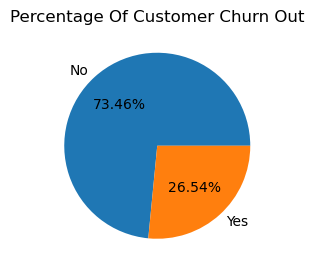

In [11]:
plt.figure(figsize=(3,4))
gr=data.groupby('Churn').agg({'Churn':'count'})
plt.pie(gr['Churn'],labels=gr.index,autopct="%1.2f%%")
plt.title("Percentage Of Customer Churn Out")
plt.show()

# 1.Above paichart we can conclude that 26.54% customer churnout.
# 2.Now find the reasone behind it.

In [12]:
gr1=data.groupby('gender').agg({'gender':'count'})
gr1

,gender
gender,
Female,3488
Male,3555


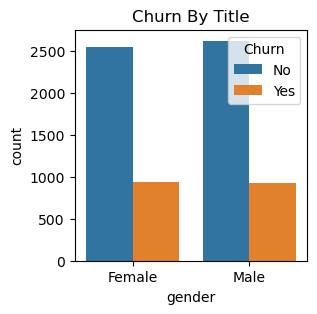

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender',data=data,hue="Churn")
plt.title("Churn By Title")
plt.show()

In [14]:
gr2=data.groupby('SeniorCitizen').agg({'SeniorCitizen':'count'})
gr2

,SeniorCitizen
SeniorCitizen,
0,5901
1,1142


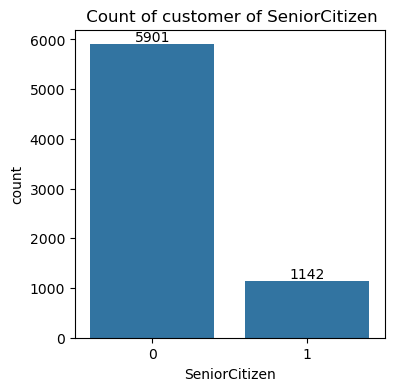

In [15]:
plt.figure(figsize=(4,4))
sz=sns.countplot(x='SeniorCitizen',data=data)
sz.bar_label(sz.containers[0])
plt.title(" Count of customer of SeniorCitizen")
plt.show()

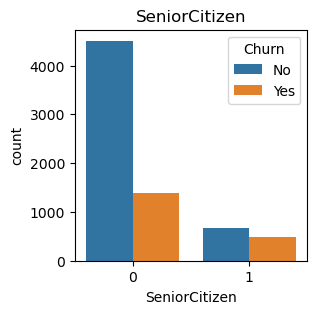

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(x='SeniorCitizen',data=data,hue="Churn")
plt.title("SeniorCitizen")
plt.show()

In [18]:
len(data['tenure'])

7043

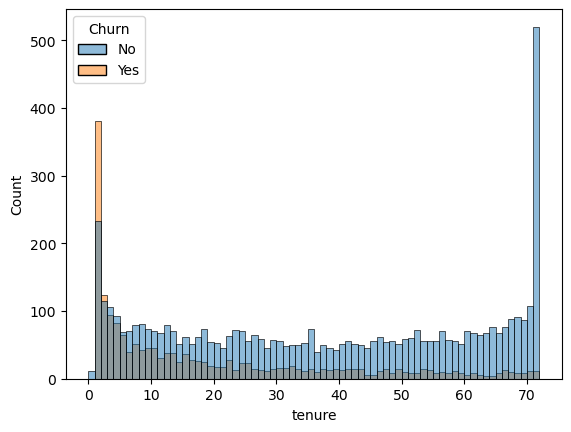

In [17]:
sns.histplot(x="tenure",data=data,bins=72,hue='Churn')
plt.show()

In [18]:
print(data['tenure'].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


## People who have used our services for a long time have stayed and people who have used our service for 1or 2 month have churned.

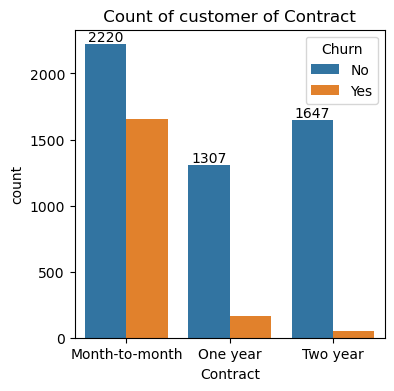

In [19]:
plt.figure(figsize=(4,4))
sz=sns.countplot(x='Contract',data=data,hue="Churn")
sz.bar_label(sz.containers[0])
plt.title(" Count of customer of Contract ")
plt.show()

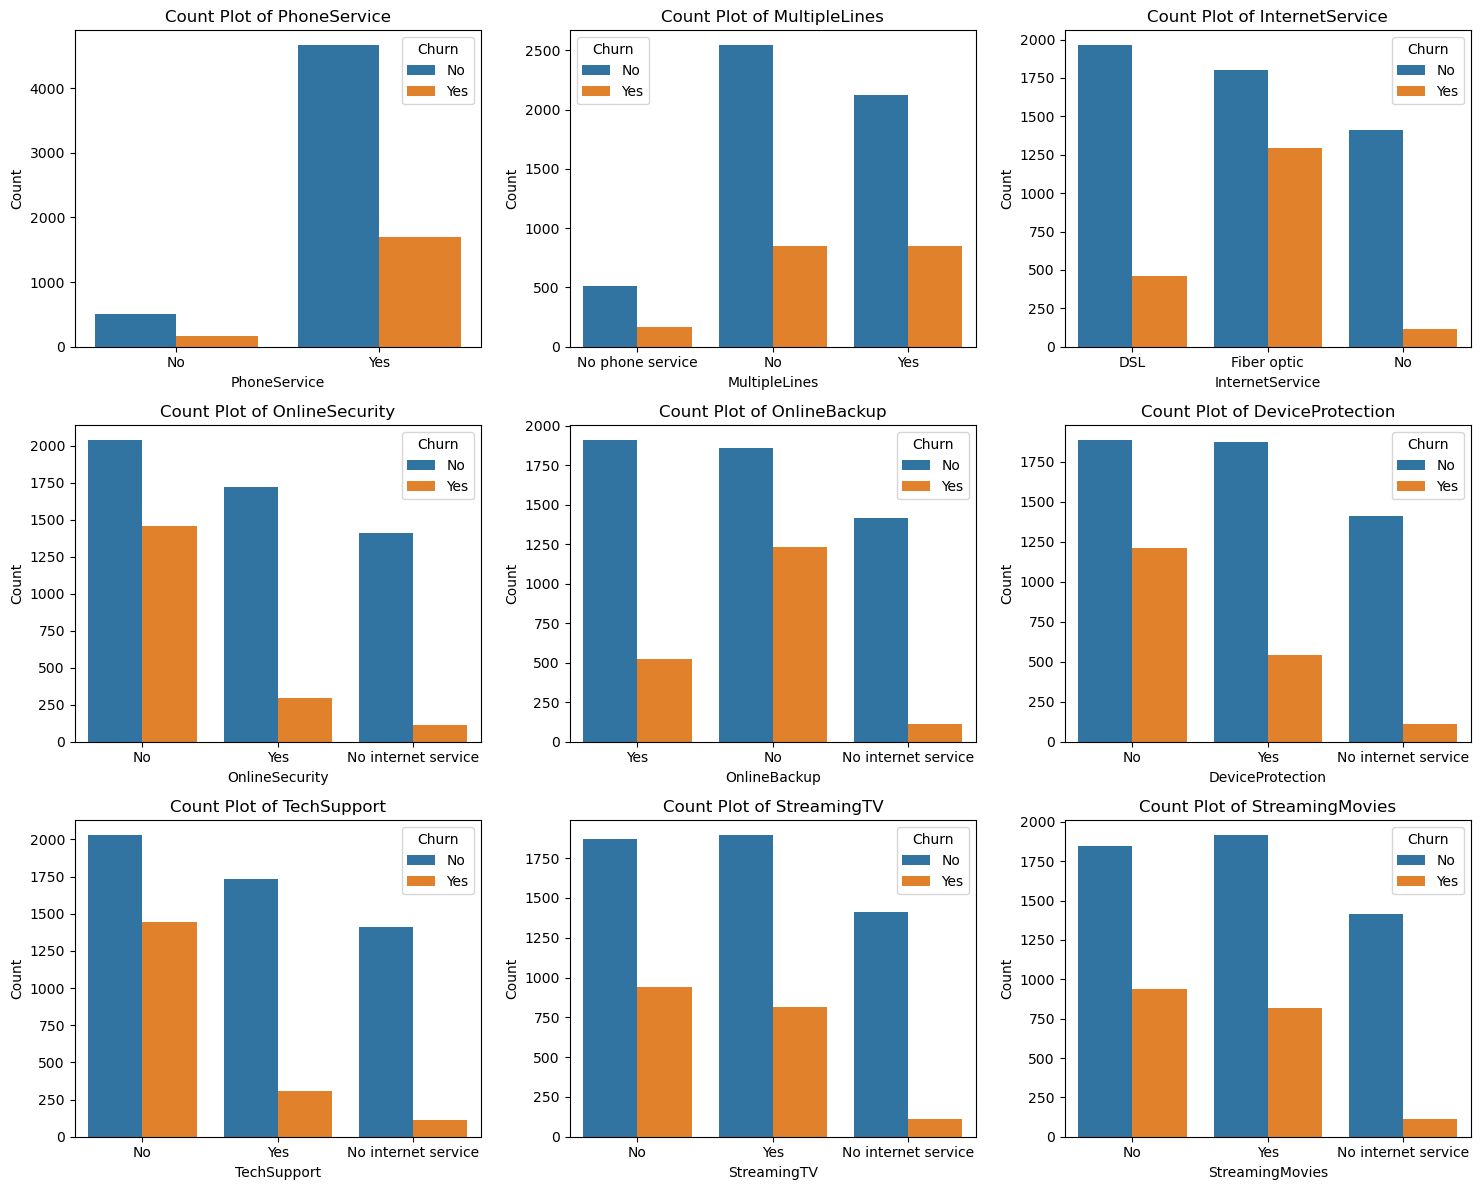

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue = data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

## People who have month to month contract are to churn then from those who have 1 or 2 year contract churn out possible is less.

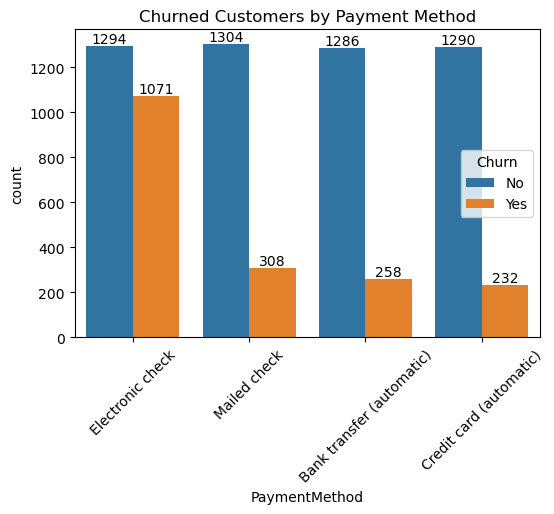

In [34]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

## customer is likely to churn when he is using electronic check as a payment method.
